**Import Library**

In [1]:
import numpy as np 
import pandas as pd
from pymongo import MongoClient
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ---Memuat DataFrame dari CSV---
df = pd.read_csv(r"C:\Users\Pongo\Project\train_LZdllcl.csv")
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


**Analysis Data**

In [3]:
# Shape
print("Jumlah baris dan kolom:", df.shape)

# Tipe data per kolom
print("\nTipe data:")
print(df.dtypes)

# Statistik deskriptif
print("\nStatistik deskriptif:")
print(df.describe(include='all'))

#Cek duplikasi
print("\nJumlah duplikat:", df.duplicated().sum())

Jumlah baris dan kolom: (54808, 14)

Tipe data:
employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

Statistik deskriptif:
         employee_id         department    region   education gender  \
count   54808.000000              54808     54808       52399  54808   
unique           NaN                  9        34           3      2   
top              NaN  Sales & Marketing  region_2  Bachelor's      m   
freq             NaN              16840     12343       36669  38496   
mean    39195.830627                NaN       NaN         NaN    NaN   
std     22586.581449               

In [4]:
len(df)

54808

In [5]:

print("\nMissing values:")
print(df.isnull().sum())


Missing values:
employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64


In [6]:
df = df.dropna()
len(df)

48660

In [7]:
# ---Mengecek Missing Values---
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


In [8]:
# ---Mengubah Tipe Data---
df['previous_year_rating'] = df['previous_year_rating'].astype(np.int64)

In [9]:
# ---Menghapus Duplikasi---
df.drop_duplicates(inplace=True)
print("\nJumlah duplikat:", df.duplicated().sum())


Jumlah duplikat: 0


In [10]:
len(df)

48660

In [11]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3,2,0,0,73,0


In [12]:
# ---Menghapus Kolom yang Tidak Diperlukan---
df.drop(["employee_id", "region"], axis=1, inplace=True)

In [13]:
# ---Mengubah String menjadi Kategori---
df.department = df.department.map({"Sales & Marketing":0,
                 "Operations":1,
                 "Technology":2,
                 "Analytics":3,
                 "R&D":4,
                 "Procurement":5,
                 "Finance":6,
                 "HR":7,
                 "Legal":8})
df.education = df.education.map({"Master's & above":0,
                                "Bachelor's":1,
                                "Below Secondary":2})
df.gender = df.gender.map({"f":0,
                          "m":1})
df.recruitment_channel = df.recruitment_channel.map({"sourcing":0,
                                                    "other":1,
                                                    "referred":2})
df.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,0,0,0,1,35,5,8,1,0,49,0
1,1,1,1,1,1,30,5,4,0,0,60,0
2,0,1,1,0,1,34,3,7,0,0,50,0
3,0,1,1,1,2,39,1,10,0,0,50,0
4,2,1,1,1,1,45,3,2,0,0,73,0


In [14]:
# --- Menyeimbangkan Promosi ---
promoted_df = df[df['is_promoted'] == 1]
not_promoted_df = df[df['is_promoted'] == 0]

# Undersampling data tidak dipromosi sebanyak jumlah data dipromosi
not_promoted_sampled = not_promoted_df.sample(n=len(promoted_df), random_state=42)

# Gabungkan jadi dataset seimbang secara promosi
balanced_df = pd.concat([promoted_df, not_promoted_sampled])

# --- Menyeimbangkan Gender ---
female_df = balanced_df[balanced_df['gender'] == 0]
male_df = balanced_df[balanced_df['gender'] == 1]

# Undersampling laki-laki sebanyak jumlah perempuan
male_sampled = male_df.sample(n=len(female_df), random_state=42)

# Update balanced_df supaya seimbang secara promosi dan gender
balanced_df = pd.concat([female_df, male_sampled])

len(balanced_df)

5262

In [15]:
# --- 3. Visualisasi Data ---
import plotly.express as px
promo = pd.DataFrame(balanced_df.is_promoted.value_counts())
promo.columns = ["Promoted"]
promo["Values"] = promo.index
promo["Values"] = promo["Values"].map({0: "Not Promoted", 1: "Promoted"})

fig = px.pie(
    promo,
    values="Promoted",
    names="Values",
    title="Promoted Employees",
    color_discrete_sequence=px.colors.qualitative.Pastel2
)

fig.update_layout(autosize=False, width=1000, height=500)
fig.show()

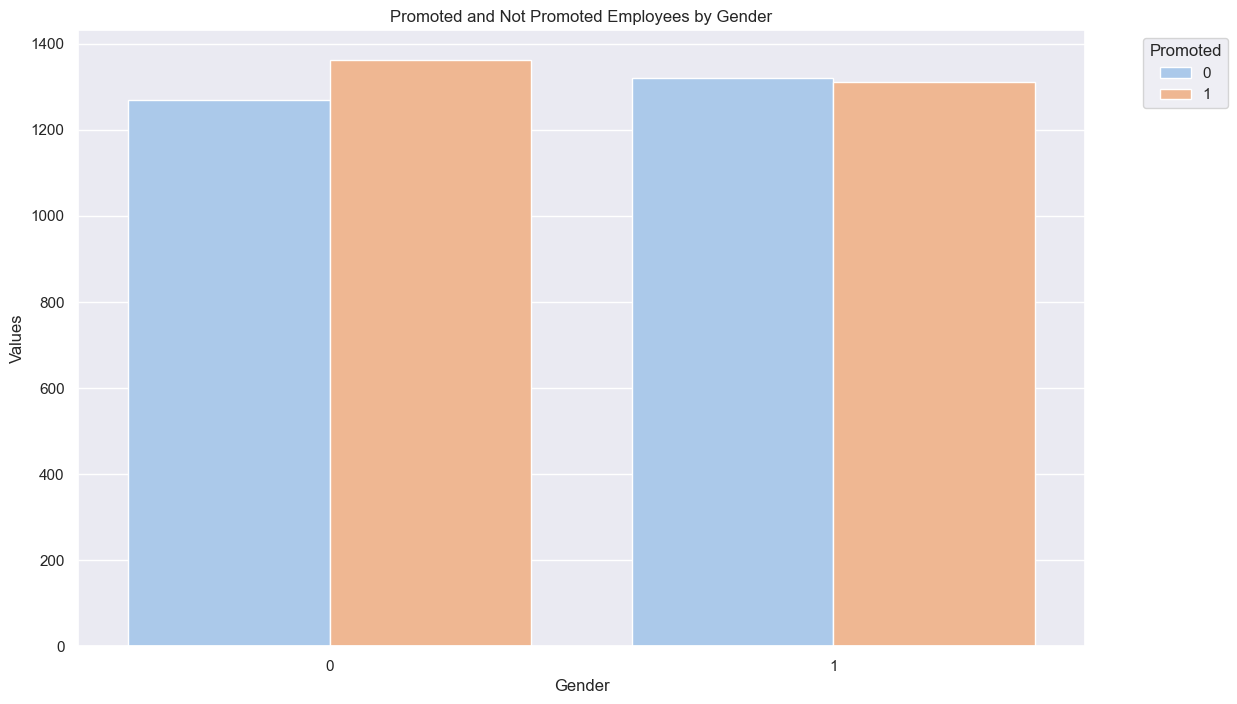

In [16]:
# --- 4. Visualisasi Promosi berdasarkan Jenis Kelamin ---
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
sns.set_palette("pastel")

gender = pd.DataFrame(balanced_df.groupby("is_promoted").gender.value_counts().reset_index(name='Values'))

plt.figure(figsize=(13, 8))
sns.barplot(x='gender', y='Values', data=gender, hue='is_promoted')
plt.title("Promoted and Not Promoted Employees by Gender")
plt.legend(title='Promoted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Gender')
plt.show()

In [17]:
# ---Menyimpan Data ke MongoDB---
client = MongoClient("mongodb://localhost:27017/")
db = client["staff_db"]
collection = db["cleaned_data"]

data_dict = balanced_df.to_dict("records")
collection.insert_many(data_dict)

InsertManyResult([ObjectId('681a2a86a522f6645b22fcf2'), ObjectId('681a2a86a522f6645b22fcf3'), ObjectId('681a2a86a522f6645b22fcf4'), ObjectId('681a2a86a522f6645b22fcf5'), ObjectId('681a2a86a522f6645b22fcf6'), ObjectId('681a2a86a522f6645b22fcf7'), ObjectId('681a2a86a522f6645b22fcf8'), ObjectId('681a2a86a522f6645b22fcf9'), ObjectId('681a2a86a522f6645b22fcfa'), ObjectId('681a2a86a522f6645b22fcfb'), ObjectId('681a2a86a522f6645b22fcfc'), ObjectId('681a2a86a522f6645b22fcfd'), ObjectId('681a2a86a522f6645b22fcfe'), ObjectId('681a2a86a522f6645b22fcff'), ObjectId('681a2a86a522f6645b22fd00'), ObjectId('681a2a86a522f6645b22fd01'), ObjectId('681a2a86a522f6645b22fd02'), ObjectId('681a2a86a522f6645b22fd03'), ObjectId('681a2a86a522f6645b22fd04'), ObjectId('681a2a86a522f6645b22fd05'), ObjectId('681a2a86a522f6645b22fd06'), ObjectId('681a2a86a522f6645b22fd07'), ObjectId('681a2a86a522f6645b22fd08'), ObjectId('681a2a86a522f6645b22fd09'), ObjectId('681a2a86a522f6645b22fd0a'), ObjectId('681a2a86a522f6645b22fd